In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import numpy as np
from matplotlib import pyplot as plt

In [47]:
from test import load_attr, show_latent, load_model
attr_dir = 'Data/celeba'
tmp = load_attr(attr_dir)

version = 14
model_dir = f'logs/CelebA/BTVAE/version_{version}'
model = load_model(model_dir)

attribute file loaded
model loaded


In [48]:
tmp.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [49]:
sampled = tmp.sample(200, random_state=152)
file_name = list(sampled.index)


In [50]:
from test import show_latent
show_latent(file_name, model)

torch.Size([200, 3, 64, 64])


tensor([[ 1.6393,  0.5196, -0.3685,  ..., -1.8905, -0.0069, -0.1366],
        [ 1.3458, -0.9202, -0.0788,  ..., -1.3504, -0.0918,  0.0352],
        [-0.6201, -0.3969, -0.0501,  ..., -0.6558, -0.0066, -0.0239],
        ...,
        [-0.3125,  0.2131, -0.1088,  ..., -0.3598, -0.0226,  0.0248],
        [-1.8590,  0.2541,  0.2120,  ..., -0.1676, -0.0371, -0.0911],
        [-0.2076,  0.3426, -0.0697,  ..., -1.8641, -0.0243, -0.2163]],
       grad_fn=<AddmmBackward0>)

In [51]:
a = show_latent(file_name, model)

torch.Size([200, 3, 64, 64])


In [52]:
a[0]

tensor([ 1.6393e+00,  5.1961e-01, -3.6851e-01,  1.3509e-02, -2.0092e-01,
         5.7175e-02, -1.7497e-01,  7.9813e-02, -1.5857e-02, -1.4434e-02,
         1.6013e-01, -5.3777e-01,  4.2242e-02, -9.0998e-02, -5.6267e-02,
         4.1103e-02,  4.9690e-02, -1.2663e-01, -5.5583e-02, -3.0705e-02,
        -1.2581e-01,  4.1676e-01,  3.0618e-01,  1.4505e-01, -5.0755e-03,
        -4.8747e-02,  7.4917e-02,  1.5507e-02,  2.7113e-01, -1.7647e-01,
         1.3873e-01,  1.0686e-01,  7.9736e-02,  4.8347e-03, -1.0641e-01,
        -6.0450e-02,  8.0623e-01, -8.1441e-01,  1.2985e-01, -3.7368e-02,
        -3.0081e-01,  5.0834e-02, -6.6442e-02, -8.8488e-02, -5.3270e-02,
        -2.3979e-01, -2.7851e-01, -1.7545e-02,  1.2139e-01, -4.4705e-02,
         1.8535e-02,  6.8442e-01, -5.6150e-02, -3.8846e-02, -1.3684e-02,
         6.8991e-02, -1.5327e-01,  5.1714e-03,  1.1026e+00, -1.1992e-01,
         4.9085e-02, -7.5522e-01, -1.0414e-01,  1.4972e+00, -9.7205e-02,
        -1.4429e+00, -2.4534e-03,  1.4335e+00, -7.0

In [53]:
a_numpy = a.detach().cpu().numpy()

In [54]:
a_numpy.shape

(200, 128)

In [55]:
a_standardized = (a_numpy - np.mean(a_numpy, axis=0)) / np.std(a_numpy, axis=0)
sampled_labels = sampled.to_numpy()
sampled_labels_std = (sampled_labels - np.mean(sampled_labels, axis=0)) / np.std(sampled_labels, axis=0)

In [56]:
a_standardized

array([[ 1.6390476 ,  0.50511736, -1.9879607 , ..., -1.9099255 ,
         0.4041166 , -1.2412313 ],
       [ 1.3568873 , -1.309198  , -0.38127604, ..., -1.3638997 ,
        -0.93804866,  0.7804841 ],
       [-0.5327053 , -0.64970565, -0.22187397, ..., -0.66165656,
         0.40917382,  0.08551656],
       ...,
       [-0.23704827,  0.11891101, -0.54752314, ..., -0.36239648,
         0.15588078,  0.65886784],
       [-1.723561  ,  0.17054814,  1.2318083 , ..., -0.16804908,
        -0.07314654, -0.7052918 ],
       [-0.17480671,  0.9581171 ,  0.84647316, ..., -2.0637822 ,
        -0.00391614, -0.0931739 ]], dtype=float32)

In [57]:
corr = a_standardized.T @ sampled_labels_std
corr

array([[ 33.78385233, -18.77005905, -26.44409899, ..., -18.90576634,
         18.79794287, -21.34375282],
       [ -5.6949756 ,  -1.02435381,  -3.78318081, ...,  -2.84818574,
         16.88578579,  36.13905919],
       [-19.66963928,  -4.66292437,   9.03567898, ...,   2.9996277 ,
        -12.76569964,  -5.77879403],
       ...,
       [ 54.41747817,  -4.61585804, -10.06644882, ..., -20.09510899,
         12.80132928,  11.653421  ],
       [-15.22504777,  -5.01892456,   1.92957597, ...,  14.61832714,
        -11.80458295,  -6.70614224],
       [ 21.92621691,   6.32497909,  13.77904615, ...,   1.75111444,
         -2.16990171, -13.73068116]])

In [72]:
np.mean(np.abs(corr))

12.760731830216764

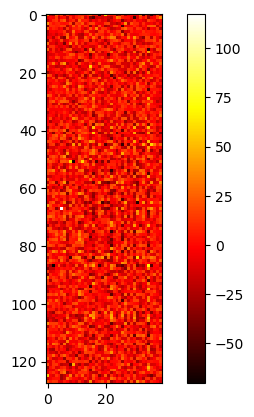

In [58]:
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [70]:
np.argwhere(corr > 65)

array([[67,  5],
       [87, 35]])

In [60]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

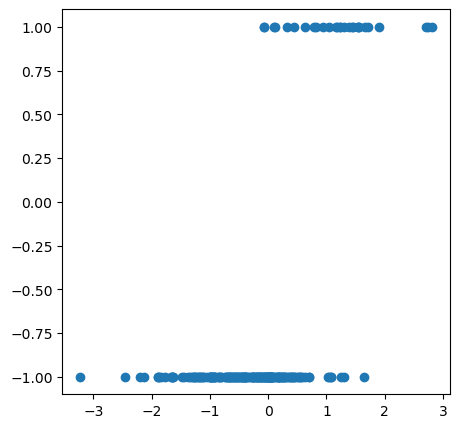

In [68]:
def visualize_latent(latent: list, attr: pd.DataFrame):
    '''
    given a list of latent vectors and the attribute file, 
    visualize the latent vectors with respect to attributes

    Parameters
        latent: list of latent vectors
        attr: attribute file

    Returns
        None
    '''
    # generate dummy data
    latent = a.detach().cpu().numpy()
     
    # visualize the latent vectors with respect to attributes
    # draw scatter plots
    plt.figure(figsize=(5, 5))
    plt.scatter(latent[:, 67], sampled_labels[:, 5])
    plt.show()

    pass

visualize_latent([], sampled)


In [62]:
# get unique values of each attribute
unique_values = {}
for col in sampled.columns:
    unique_values[col] = sampled[col].unique()
unique_values

{'5_o_Clock_Shadow': array([-1,  1]),
 'Arched_Eyebrows': array([-1,  1]),
 'Attractive': array([ 1, -1]),
 'Bags_Under_Eyes': array([-1,  1]),
 'Bald': array([-1,  1]),
 'Bangs': array([ 1, -1]),
 'Big_Lips': array([-1,  1]),
 'Big_Nose': array([-1,  1]),
 'Black_Hair': array([ 1, -1]),
 'Blond_Hair': array([-1,  1]),
 'Blurry': array([-1,  1]),
 'Brown_Hair': array([-1,  1]),
 'Bushy_Eyebrows': array([-1,  1]),
 'Chubby': array([-1,  1]),
 'Double_Chin': array([-1,  1]),
 'Eyeglasses': array([-1,  1]),
 'Goatee': array([-1,  1]),
 'Gray_Hair': array([-1,  1]),
 'Heavy_Makeup': array([ 1, -1]),
 'High_Cheekbones': array([-1,  1]),
 'Male': array([-1,  1]),
 'Mouth_Slightly_Open': array([-1,  1]),
 'Mustache': array([-1,  1]),
 'Narrow_Eyes': array([-1,  1]),
 'No_Beard': array([ 1, -1]),
 'Oval_Face': array([ 1, -1]),
 'Pale_Skin': array([ 1, -1]),
 'Pointy_Nose': array([-1,  1]),
 'Receding_Hairline': array([-1,  1]),
 'Rosy_Cheeks': array([-1,  1]),
 'Sideburns': array([-1,  1]),
 '